<a href="https://colab.research.google.com/github/Vagarh/Master-in-Data-Science-assignments/blob/main/Transer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Descarga y descomprimir el Zip tiny-imagenet-200
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
!unzip tiny-imagenet-200.zip
current="$(pwd)/tiny-imagenet-200"

URL transformed to HTTPS due to an HSTS policy
--2024-04-09 15:47:07--  https://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.64.64
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  5.64MB/s    in 50s     

2024-04-09 15:47:58 (4.70 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]

Archive:  tiny-imagenet-200.zip
replace tiny-imagenet-200/words.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! pip install tensorflow
! pip install tensorflow-addons

In [1]:
## Carga de librerias
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
# Ruta del archivo ZIP
zip_file_path = "tiny-imagenet-200.zip"

# Directorio donde se descomprimirá el archivo
extract_dir = "tiny-imagenet-200"

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Obtener la ruta completa del directorio actual
current_dir = os.getcwd()

# Ruta completa del directorio descomprimido
extracted_dir_path = os.path.join(current_dir, extract_dir)

# Cambiar el directorio de trabajo al directorio descomprimido
os.chdir(extracted_dir_path)

# Verificar que se haya creado el directorio y mostrar su contenido
print("Directorio descomprimido:", extracted_dir_path)
print("Contenido del directorio:")
print(os.listdir(extracted_dir_path))

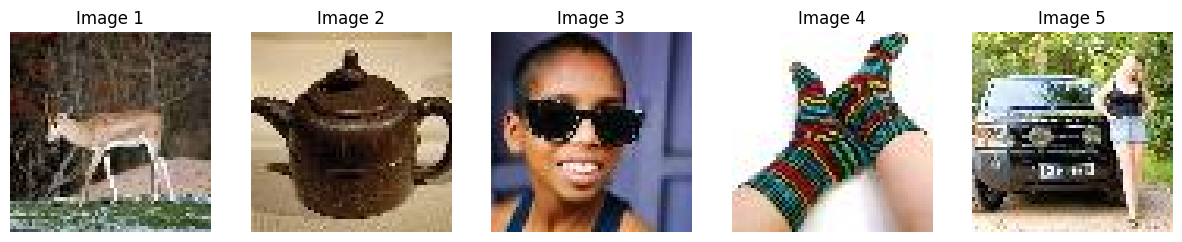

In [2]:
def print_random_images(directory, num_images=5):
    # Lista para almacenar todas las rutas de las imágenes encontradas
    image_paths = []

    # Recorre recursivamente el directorio y sus subcarpetas
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Verifica si el archivo es una imagen
            if file.endswith(('.png', '.jpg', '.JPEG', '.jpeg', '.PNG', '.JPG')):
                # Agrega la ruta completa del archivo a la lista
                image_paths.append(os.path.join(root, file))

    # Selecciona 5 imágenes al azar si hay al menos 5 imágenes disponibles
    if len(image_paths) >= num_images:
        random_images = random.sample(image_paths, num_images)

        # Mostrar las imágenes seleccionadas
        plt.figure(figsize=(15, 10))
        for i, image_path in enumerate(random_images, 1):
            image = mpimg.imread(image_path)
            plt.subplot(1, num_images, i)
            plt.imshow(image)
            plt.title(f"Image {i}")
            plt.axis('off')
        plt.show()
    else:
        print("No hay suficientes imágenes disponibles para seleccionar aleatoriamente.")

# Directorio principal que se va a explorar
directory = "/content/tiny-imagenet-200/train"

# Llamada a la función para imprimir 5 imágenes aleatorias del directorio y sus subcarpetas
print_random_images(directory)

# Crear un DataGenerator personalizado para el conjunto de datos

In [3]:
# Directorios de entrenamiento, validación y prueba
train_dir = "/content/tiny-imagenet-200/train"
validation_dir = "/content/tiny-imagenet-200/val"
test_dir = "/content/tiny-imagenet-200/test"

# Parámetros del generador de imágenes
batch_size = 32
image_size = (64, 64)  # Tamaño de las imágenes en el conjunto de datos

# Generador de imágenes para entrenamiento con aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Reescalar los valores de píxeles a un rango de [0,1]
    rotation_range=20,          # Rotación aleatoria en el rango de 20 grados
    width_shift_range=0.2,      # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,     # Desplazamiento vertical aleatorio
    shear_range=0.2,            # Cambio de inclinación aleatorio
    zoom_range=0.2,             # Zoom aleatorio
    horizontal_flip=True       # Volteo horizontal aleatorio
)

# Generador de imágenes para validación y prueba (sin aumento de datos)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Generadores de datos para entrenamiento, validación y prueba
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'    # Utilizamos categorical porque Tiny ImageNet-200 es un problema de clasificación multiclase
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

classes = list(train_generator.class_indices.keys())
print('Classes:'+str(classes))
num_classes = len(classes)

Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 1 classes.
Found 10000 images belonging to 1 classes.


# Crear un modelo básico de red neuronal (utilizando dropout y batcnorm para regularizar)


In [4]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),

        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])

    return model

In [10]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, SeparableConv2D

def create_model(input_shape, num_classes):
    model = Sequential([
        SeparableConv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),
        SeparableConv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        SeparableConv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        SeparableConv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        SeparableConv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        SeparableConv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        GlobalAveragePooling2D(),

        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])

    return model

In [11]:
input_shape = (64, 64, 3)  # Supongamos que las imágenes son de 64x64 píxeles y tienen 3 canales de color (RGB)
num_classes = 200  # Número de clases en el conjunto de dato

In [12]:
# Crea el modelo
model = create_model(input_shape, num_classes)

In [13]:
# Compila el modelo
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [14]:
# Muestra un resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separabl  (None, 64, 64, 32)        155       
 eConv2D)                                                        
                                                                 
 batch_normalization_4 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 separable_conv2d_1 (Separa  (None, 64, 64, 32)        1344      
 bleConv2D)                                                      
                                                                 
 batch_normalization_5 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)       

# Entrenar el modelo y mostrar el rendimiento en los conjuntos de entrenamiento, validación y prueba

In [15]:
# Entrenamiento del modelo
history = model.fit(
    train_generator,
    epochs=10,  # Número de épocas de entrenamiento
    validation_data=validation_generator
)

# Evaluación del rendimiento en el conjunto de pruebas
test_loss, test_accuracy = model.evaluate(test_generator)

print("Rendimiento en el conjunto de entrenamiento:")
print("Loss:", history.history['loss'][-1])
print("Accuracy:", history.history['accuracy'][-1])

print("\nRendimiento en el conjunto de validación:")
print("Validation Loss:", history.history['val_loss'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

print("\nRendimiento en el conjunto de prueba:")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
3125/3125 [==============================] - 163s 50ms/step - loss: 4.8028 - accuracy: 0.0524 - val_loss: 1403.2045 - val_accuracy: 6.0000e-04
Epoch 2/10
3125/3125 [==============================] - 160s 51ms/step - loss: 4.2001 - accuracy: 0.1079 - val_loss: 1533.4799 - val_accuracy: 0.0051
Epoch 3/10
3125/3125 [==============================] - 166s 53ms/step - loss: 3.9674 - accuracy: 0.1415 - val_loss: 1615.0654 - val_accuracy: 0.0018
Epoch 4/10
3125/3125 [==============================] - 157s 50ms/step - loss: 3.8164 - accuracy: 0.1629 - val_loss: 1587.6862 - val_accuracy: 0.0028
Epoch 5/10
3125/3125 [==============================] - 156s 50ms/step - loss: 3.7229 - accuracy: 0.1810 - val_loss: 1712.0734 - val_accuracy: 0.0017
Epoch 6/10
3125/3125 [==============================] - 156s 50ms/step - loss: 3.6400 - accuracy: 0.1934 - val_loss: 1758.8073 - val_accuracy: 0.0036
Epoch 7/10
3125/3125 [==============================] - 156s 50ms/step - loss: 3.5714 - accuracy

**Rendimiento en el conjunto de entrenamiento**:
* Loss (Pérdida): La pérdida en el conjunto de entrenamiento es 3.446, lo que indica que, en promedio, el modelo tiene un error de 3.446 en sus predicciones durante el entrenamiento.
*Accuracy (Precisión): La precisión en el conjunto de entrenamiento es de aproximadamente 0.227, lo que significa que el modelo clasifica correctamente alrededor del 22.7% de las muestras en el conjunto de entrenamiento.

**Rendimiento en el conjunto de validación:**
* Validation Loss (Pérdida de validación): La pérdida en el conjunto de validación es 1812.331, lo que sugiere que el modelo tiene un rendimiento deficiente en el conjunto de datos de validación.
* Validation Accuracy (Precisión de validación): La precisión en el conjunto de validación es de aproximadamente 0.0036, lo que indica que el modelo clasifica correctamente solo alrededor del 0.36% de las muestras en el conjunto de validación.

**Rendimiento en el conjunto de prueba:**
* Test Loss (Pérdida de prueba): La pérdida en el conjunto de prueba es 1822.298, lo que indica que el modelo tiene un rendimiento deficiente en el conjunto de datos de prueba.
* Test Accuracy (Precisión de prueba): La precisión en el conjunto de prueba es de aproximadamente 0.0032, lo que indica que el modelo clasifica correctamente solo alrededor del 0.32% de las muestras en el conjunto de prueba.

En resumen, estos resultados sugieren que el modelo no está generalizando bien a datos nuevos, ya que muestra un bajo rendimiento tanto en el conjunto de validación como en el conjunto de prueba, a pesar de su relativo mejor rendimiento en el conjunto de entrenamiento. Esto sugiere que el modelo puede estar sobreajustando al conjunto de entrenamiento y no está capturando patrones generalizables en los datos.

# Descargar un modelo pre-entrenado, el que prefieran, y hacer transfer learning para mejorar la clasificación del modelo base. Para esto pueden consultar en el siguiente link los modelos disponibles: https://keras.io/api/applications/

In [16]:
# Tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [17]:
train_dir = '/content/tiny-imagenet-200/train'
test_dir = '/content/tiny-imagenet-200/test'

# Hyperparameters
CFG = dict(
    seed = 55,
    batch_size = 16,
    img_size = (299,299),
    epochs = 10,
    patience = 10
)

In [18]:
# Augment train set only
train_data_generator = ImageDataGenerator(
        validation_split=0.15,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        preprocessing_function=preprocess_input,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.15)
test_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [19]:
# Connect generators to data in folders
train_generator = train_data_generator.flow_from_directory(train_dir, target_size=CFG['img_size'], shuffle=True, seed=CFG['seed'], class_mode='categorical', batch_size=CFG['batch_size'], subset="training")
validation_generator = val_data_generator.flow_from_directory(train_dir, target_size=CFG['img_size'], shuffle=False, seed=CFG['seed'], class_mode='categorical', batch_size=CFG['batch_size'], subset="validation")
test_generator = test_data_generator.flow_from_directory(test_dir, target_size=CFG['img_size'], shuffle=False, seed=CFG['seed'], class_mode='categorical', batch_size=CFG['batch_size'])

# Number of samples and classes
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes:'+str(classes))
num_classes = len(classes)

Found 85000 images belonging to 200 classes.
Found 15000 images belonging to 200 classes.
Found 10000 images belonging to 1 classes.
Classes:['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148', 'n02791270', 

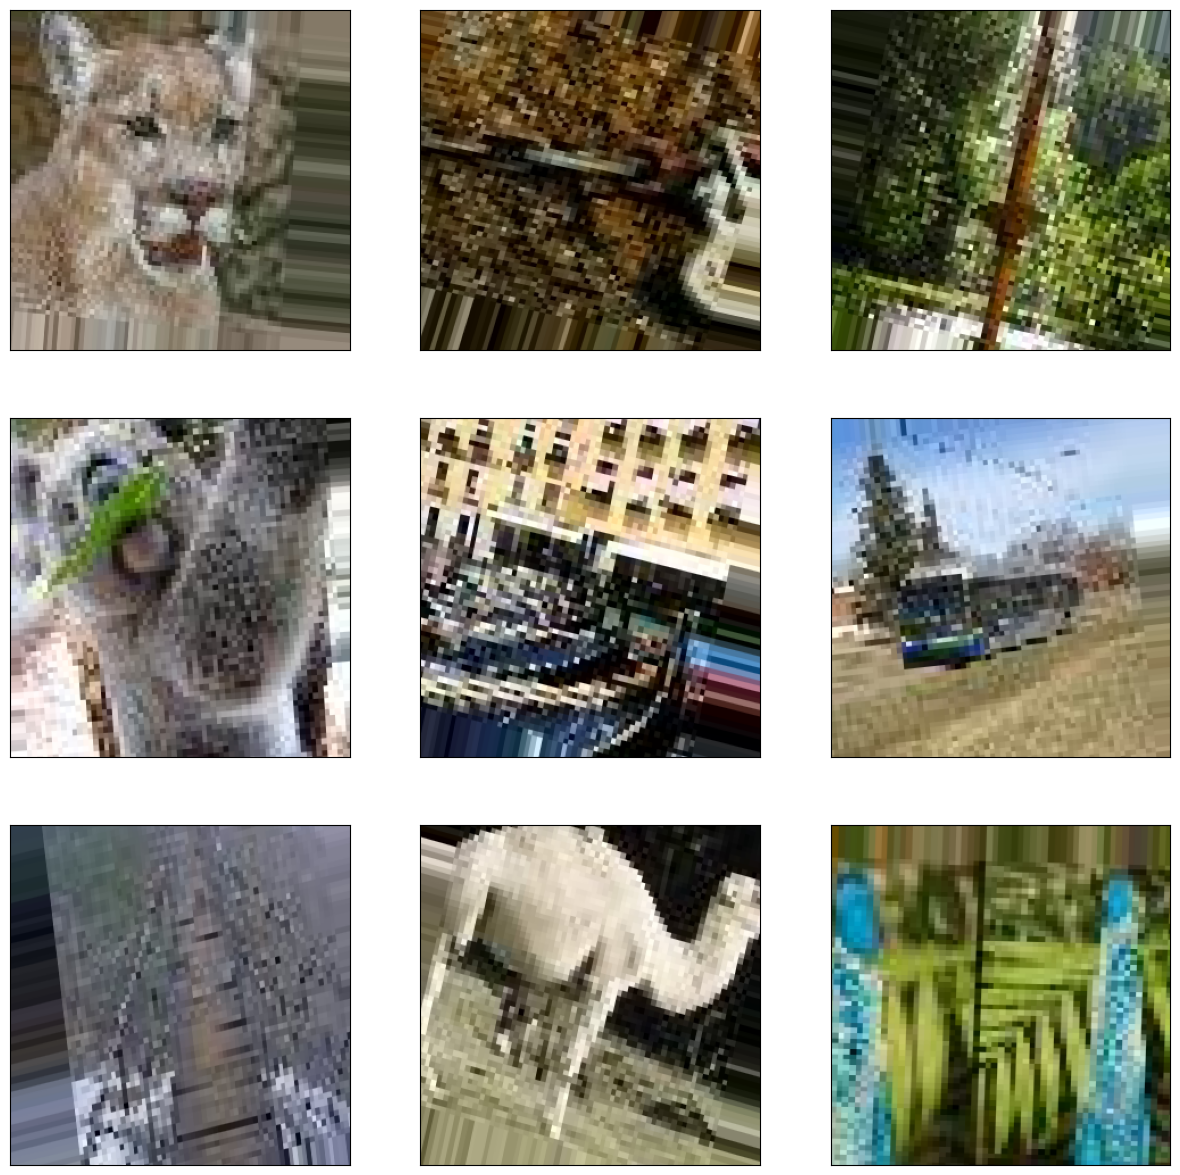

In [20]:
# Visualise some examples
plt.figure(figsize=(15,15))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    batch = (train_generator.next()[0] + 1) * 127.5
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [21]:
# Pre-trained deep convolutional neural network
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(CFG['img_size'][0], CFG['img_size'][1], 3))

# Add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling instead of Flatten
x = Dense(1024, activation='relu')(x)  # Increase the number of neurons in the first dense layer
x = Dense(512, activation='relu')(x)  # Add another dense layer
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
predictions = Dense(num_classes, activation='softmax', kernel_initializer='random_uniform')(x)

# Build model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Define optimiser
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

219055592/219055592 [==============================] - 8s 0us/step


In [22]:
# Train model
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // CFG['batch_size'],
        epochs=CFG['epochs'],
        validation_data=validation_generator,
        verbose=True,
        validation_steps=nb_validation_samples // CFG['batch_size'])

Epoch 1/10
5312/5312 [==============================] - 1752s 327ms/step - loss: 3.3563 - accuracy: 0.2649 - val_loss: 1.6571 - val_accuracy: 0.6079
Epoch 2/10
5312/5312 [==============================] - 1755s 330ms/step - loss: 2.7152 - accuracy: 0.3818 - val_loss: 1.5435 - val_accuracy: 0.6313
Epoch 3/10
5312/5312 [==============================] - 1716s 323ms/step - loss: 2.6341 - accuracy: 0.4058 - val_loss: 1.4809 - val_accuracy: 0.6497
Epoch 4/10
5312/5312 [==============================] - 1784s 336ms/step - loss: 2.6155 - accuracy: 0.4092 - val_loss: 1.4807 - val_accuracy: 0.6530
Epoch 5/10
5312/5312 [==============================] - 1690s 318ms/step - loss: 2.6147 - accuracy: 0.4111 - val_loss: 1.4850 - val_accuracy: 0.6528
Epoch 6/10
5312/5312 [==============================] - 1648s 310ms/step - loss: 2.6186 - accuracy: 0.4139 - val_loss: 1.5044 - val_accuracy: 0.6543
Epoch 7/10
5312/5312 [==============================] - 1658s 312ms/step - loss: 2.6326 - accuracy: 0.4113

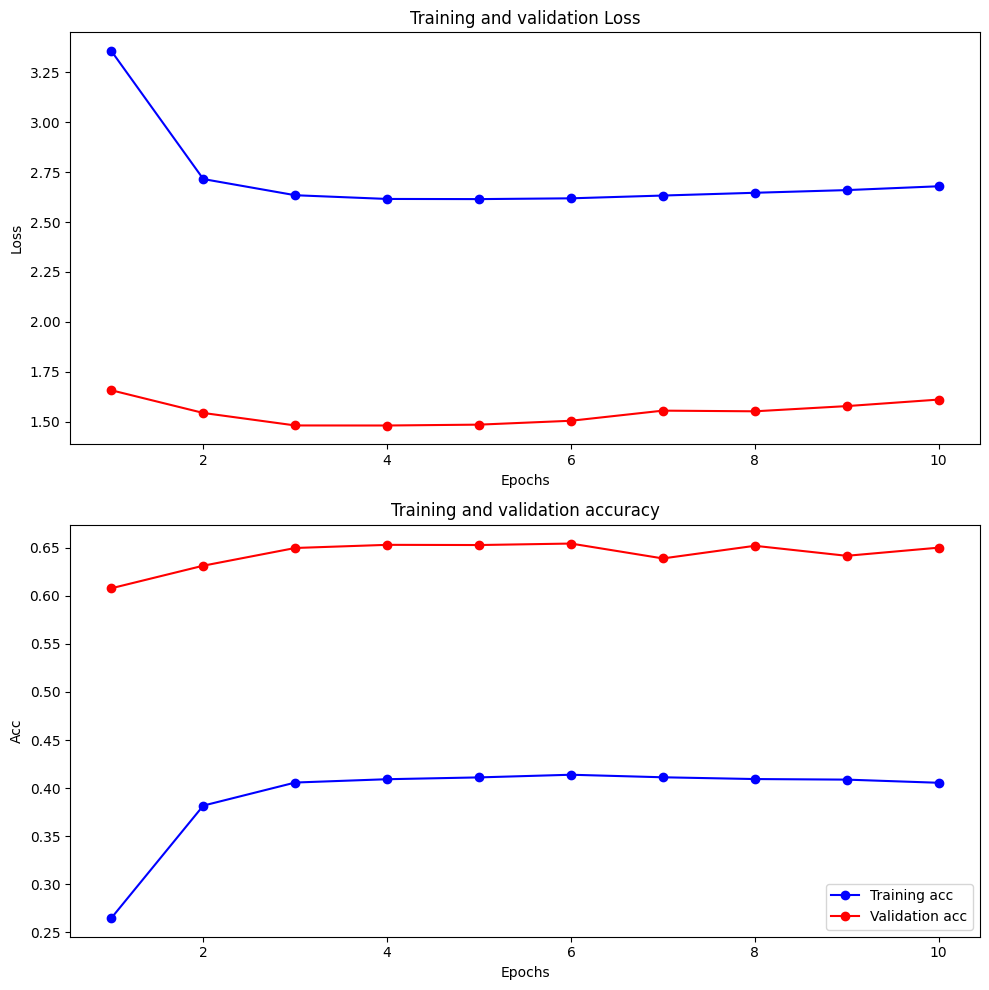

In [23]:
# History
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Loss
epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'b-o', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'r-o', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Accuracy
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'b-o', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'r-o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Evaluate on validation dataset
score = model.evaluate(validation_generator, verbose=False)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 1.6100419759750366
Val accuracy: 0.6502000093460083
